In [1]:
# 1.1.A

In [2]:
# Read csv
import numpy as np
import pandas as pd

car_df = pd.read_csv(r"C:\Users\user\Downloads\Part1+-+Car+name.csv")
print(car_df)

                      car_name
0    chevrolet chevelle malibu
1            buick skylark 320
2           plymouth satellite
3                amc rebel sst
4                  ford torino
..                         ...
393            ford mustang gl
394                  vw pickup
395              dodge rampage
396                ford ranger
397                 chevy s-10

[398 rows x 1 columns]


In [3]:
# 1.1.B

car_attributes_df = pd.read_json(r"C:\Users\user\Downloads\Part1+-+Car-Attributes.json")
print(car_attributes_df)

      mpg  cyl   disp   hp    wt   acc  yr  origin
0    18.0    8  307.0  130  3504  12.0  70       1
1    15.0    8  350.0  165  3693  11.5  70       1
2    18.0    8  318.0  150  3436  11.0  70       1
3    16.0    8  304.0  150  3433  12.0  70       1
4    17.0    8  302.0  140  3449  10.5  70       1
..    ...  ...    ...  ...   ...   ...  ..     ...
393  27.0    4  140.0   86  2790  15.6  82       1
394  44.0    4   97.0   52  2130  24.6  82       2
395  32.0    4  135.0   84  2295  11.6  82       1
396  28.0    4  120.0   79  2625  18.6  82       1
397  31.0    4  119.0   82  2720  19.4  82       1

[398 rows x 8 columns]


In [4]:
# 1.1.C

merged_df = pd.merge(car_df, car_attributes_df, left_index=True, right_index=True)
print(merged_df)

                      car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0    chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1            buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2           plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3                amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                  ford torino  17.0    8  302.0  140  3449  10.5  70       1
..                         ...   ...  ...    ...  ...   ...   ...  ..     ...
393            ford mustang gl  27.0    4  140.0   86  2790  15.6  82       1
394                  vw pickup  44.0    4   97.0   52  2130  24.6  82       2
395              dodge rampage  32.0    4  135.0   84  2295  11.6  82       1
396                ford ranger  28.0    4  120.0   79  2625  18.6  82       1
397                 chevy s-10  31.0    4  119.0   82  2720  19.4  82       1

[398 rows x 9 columns]


In [5]:
# 1.1.D

summary_stats = merged_df.describe()
print(summary_stats)

              mpg         cyl        disp           wt         acc  \
count  398.000000  398.000000  398.000000   398.000000  398.000000   
mean    23.514573    5.454774  193.425879  2970.424623   15.568090   
std      7.815984    1.701004  104.269838   846.841774    2.757689   
min      9.000000    3.000000   68.000000  1613.000000    8.000000   
25%     17.500000    4.000000  104.250000  2223.750000   13.825000   
50%     23.000000    4.000000  148.500000  2803.500000   15.500000   
75%     29.000000    8.000000  262.000000  3608.000000   17.175000   
max     46.600000    8.000000  455.000000  5140.000000   24.800000   

               yr      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
# 1.2.A

missing_percentage = merged_df.isnull().mean() * 100
print("Feature-wise percentage of missing values:")
print(missing_percentage)


Feature-wise percentage of missing values:
car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64


In [8]:
# 1.2.B

duplicate_rows = merged_df.duplicated()
print("Number of duplicated rows:", duplicate_rows.sum())

Number of duplicated rows: 0


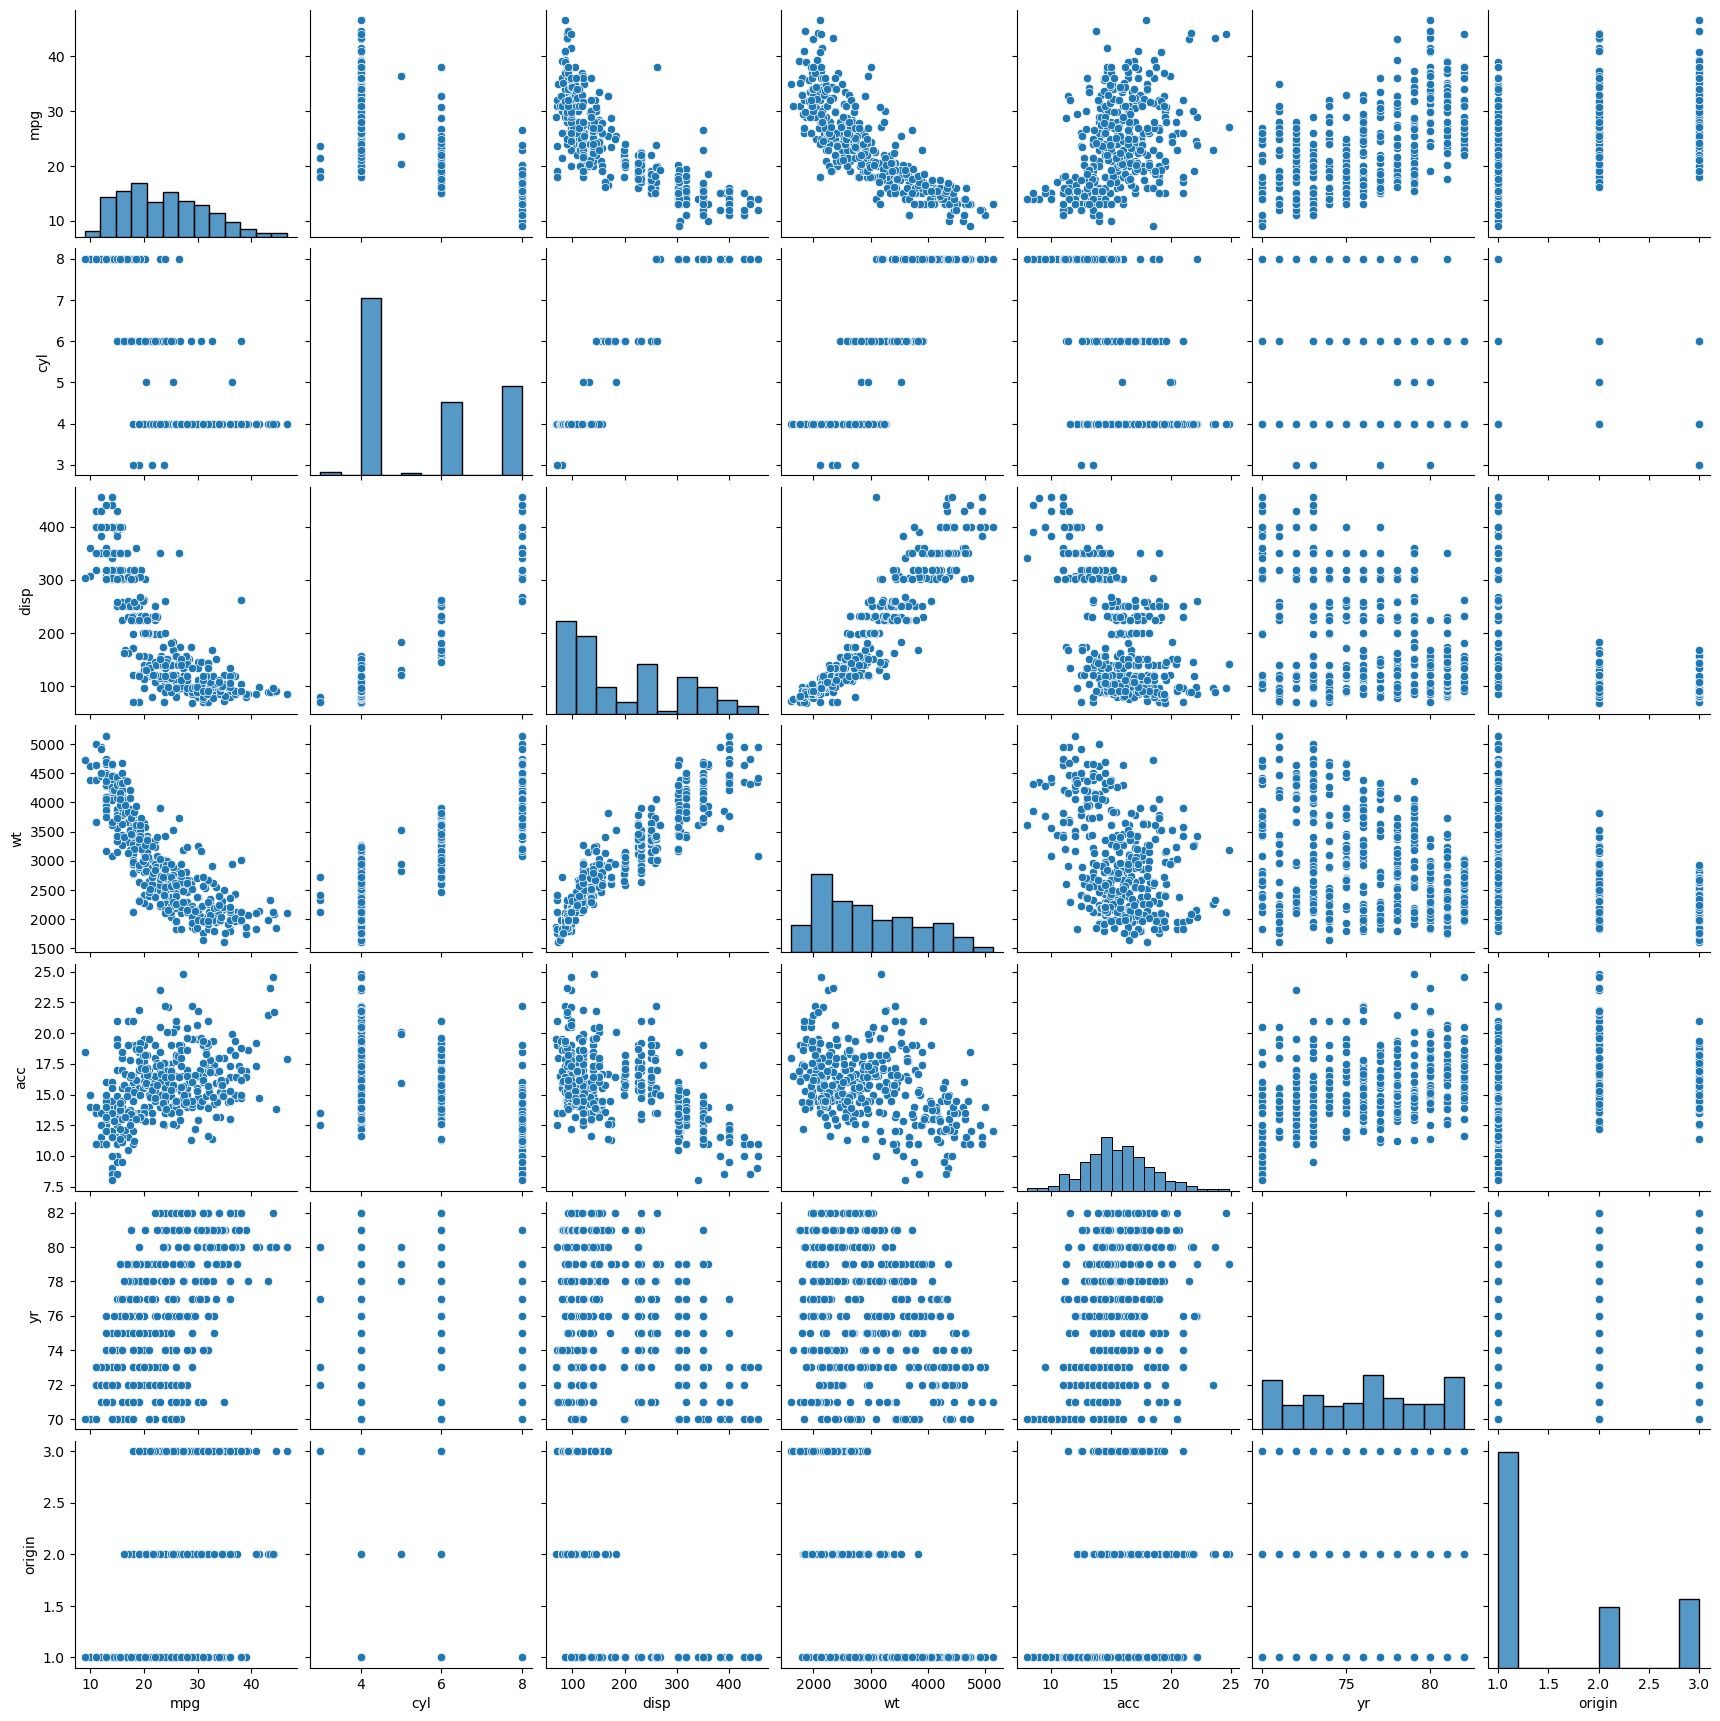

In [9]:
# 1.2.C

import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns

sns.pairplot(merged_df[numerical_columns])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

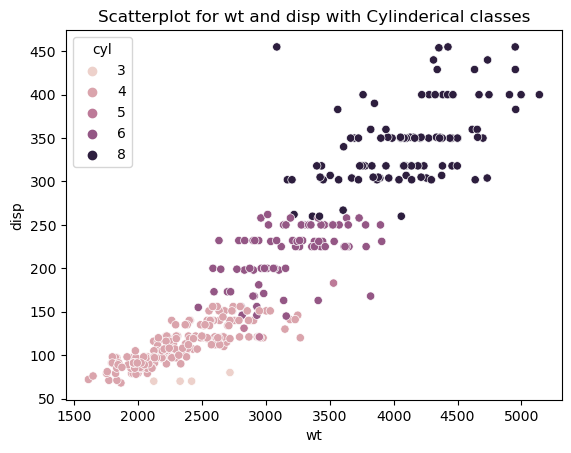

In [10]:
# 1.2.D

sns.scatterplot(data=merged_df, x='wt', y= 'disp', hue='cyl')
plt.title('Scatterplot for wt and disp with Cylinderical classes')
plt.show


In [11]:
# 1.2.E-- insights

# The scatterplot shows a positive correlation between weight ('wt') and the number of cylinders ('cyl'). As weight increases,
# the number of cylinders tends to increase, and also there is a positive correlation between displacement('disp') and the
# number of cylinders. Higher displacement values are associated with a greater number of cylinders.

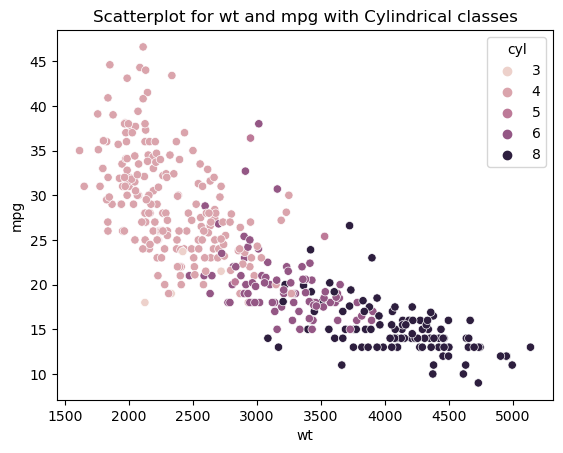

In [12]:
# 1.2.F

sns.scatterplot(data=merged_df, x='wt', y='mpg', hue='cyl')
plt.title('Scatterplot for wt and mpg with Cylindrical classes')
plt.show()

In [13]:
# 1.2.G

# The negative correlation between weight ('wt') and miles per gallon ('mpg') suggests that,heavier vehicles tend to have lower
# fuel efficiency. As weight increases, miles per gallon decreases, it also  it indicates a general trend for vehicles with more
# cylinders to be less fuel-efficient when considering weight.Automotive manufacturers and designers may use insights from this 
# negative correlation to optimize vehicle design, considering the balance between power and fuel efficiency based on weight and
# cylinder count.

In [14]:
# 1.2.H

merged_df['hp'].replace('?',np.nan, inplace=True)
merged_df['hp'] = pd.to_numeric(merged_df['hp'], errors='coerce')
merged_df.dropna(subset=['hp'], inplace=True)
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  392 non-null    object 
 1   mpg       392 non-null    float64
 2   cyl       392 non-null    int64  
 3   disp      392 non-null    float64
 4   hp        392 non-null    float64
 5   wt        392 non-null    int64  
 6   acc       392 non-null    float64
 7   yr        392 non-null    int64  
 8   origin    392 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB
None


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

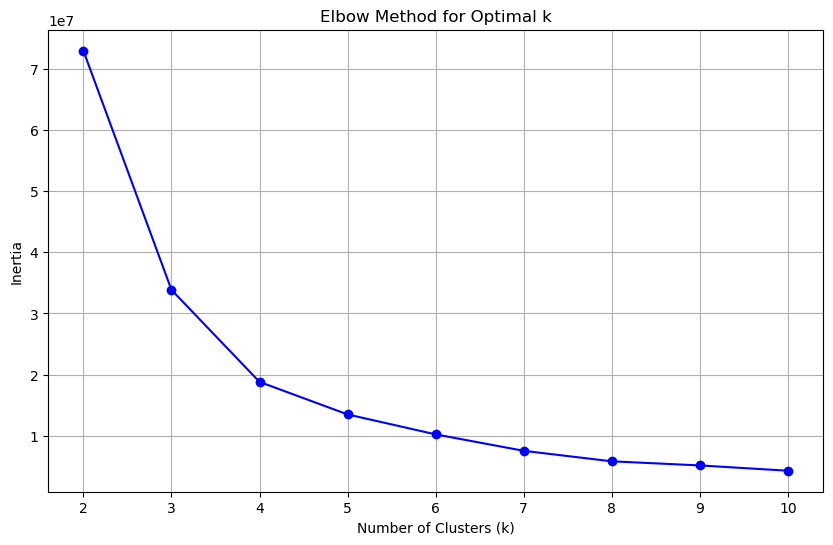

In [15]:
# 1.3.A & B

from sklearn.cluster import KMeans

features_for_clustering = merged_df[['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin']]
clusters_range = range(2, 11)
inertia_values = []

for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features_for_clustering)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(clusters_range, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

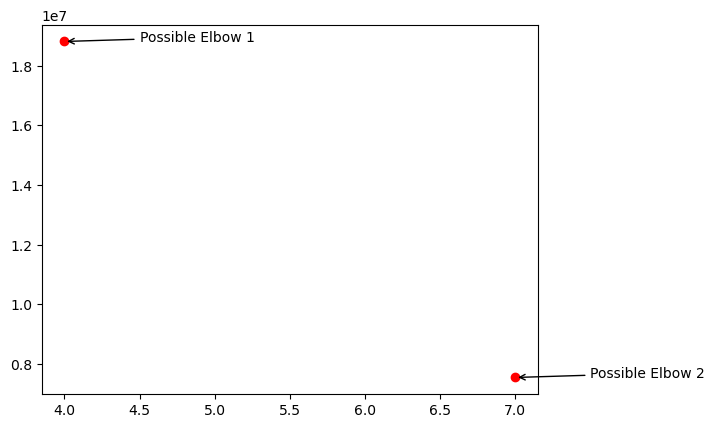

In [16]:
# 1.3.C-

possible_elbow_1 = (4, inertia_values[2])
possible_elbow_2 = (7, inertia_values[5])

plt.scatter(*possible_elbow_1, c='red', marker='o')
plt.scatter(*possible_elbow_2, c='red', marker='o')

plt.annotate('Possible Elbow 1', xy=possible_elbow_1, xytext=(possible_elbow_1[0] + 0.5, possible_elbow_1[1] + 2000),
             arrowprops=dict(facecolor='red', arrowstyle='->'))

plt.annotate('Possible Elbow 2', xy=possible_elbow_2, xytext=(possible_elbow_2[0] + 0.5, possible_elbow_2[1] + 2000),
             arrowprops=dict(facecolor='red', arrowstyle='->'))

plt.show()

In [17]:
# 1.3.D-

features_for_clustering = merged_df[['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin']]

k_optimal = 4  

kmeans_model = KMeans(n_clusters=k_optimal, random_state=42)

kmeans_model.fit(features_for_clustering)
merged_df['cluster'] = kmeans_model.labels_
print(merged_df)


                      car_name   mpg  cyl   disp     hp    wt   acc  yr  \
0    chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70   
1            buick skylark 320  15.0    8  350.0  165.0  3693  11.5  70   
2           plymouth satellite  18.0    8  318.0  150.0  3436  11.0  70   
3                amc rebel sst  16.0    8  304.0  150.0  3433  12.0  70   
4                  ford torino  17.0    8  302.0  140.0  3449  10.5  70   
..                         ...   ...  ...    ...    ...   ...   ...  ..   
393            ford mustang gl  27.0    4  140.0   86.0  2790  15.6  82   
394                  vw pickup  44.0    4   97.0   52.0  2130  24.6  82   
395              dodge rampage  32.0    4  135.0   84.0  2295  11.6  82   
396                ford ranger  28.0    4  120.0   79.0  2625  18.6  82   
397                 chevy s-10  31.0    4  119.0   82.0  2720  19.4  82   

     origin  cluster  
0         1        2  
1         1        2  
2         1        2  
3      

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [18]:
# 1.3.E

merged_df['cluster_label'] = merged_df['cluster'].astype(str)
print(merged_df)

                      car_name   mpg  cyl   disp     hp    wt   acc  yr  \
0    chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70   
1            buick skylark 320  15.0    8  350.0  165.0  3693  11.5  70   
2           plymouth satellite  18.0    8  318.0  150.0  3436  11.0  70   
3                amc rebel sst  16.0    8  304.0  150.0  3433  12.0  70   
4                  ford torino  17.0    8  302.0  140.0  3449  10.5  70   
..                         ...   ...  ...    ...    ...   ...   ...  ..   
393            ford mustang gl  27.0    4  140.0   86.0  2790  15.6  82   
394                  vw pickup  44.0    4   97.0   52.0  2130  24.6  82   
395              dodge rampage  32.0    4  135.0   84.0  2295  11.6  82   
396                ford ranger  28.0    4  120.0   79.0  2625  18.6  82   
397                 chevy s-10  31.0    4  119.0   82.0  2720  19.4  82   

     origin  cluster cluster_label  
0         1        2             2  
1         1        2     

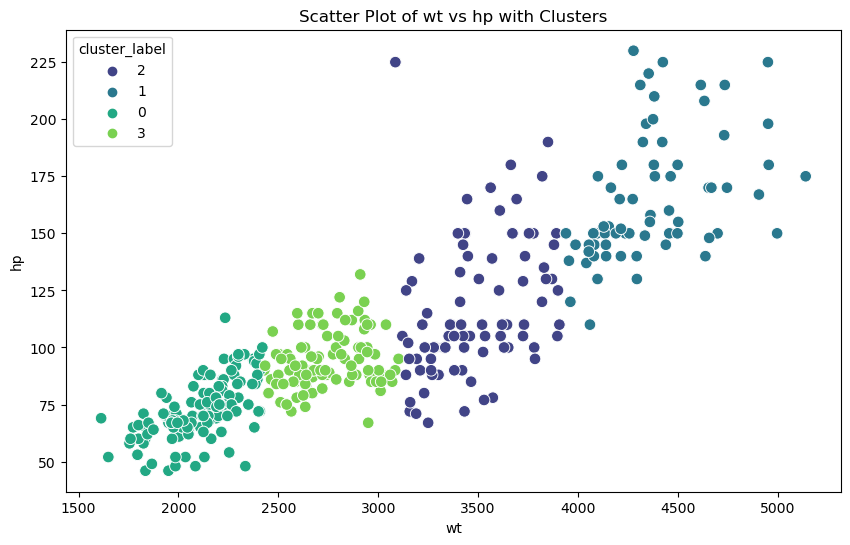

In [19]:
# 1.3.F

x_variable = 'wt'
y_variable = 'hp'

plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_variable, y=y_variable, hue='cluster_label', data=merged_df, palette='viridis', s=70)
plt.title(f'Scatter Plot of {x_variable} vs {y_variable} with Clusters')
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.show()

In [20]:
# 1.3.G

synthetic_data = pd.DataFrame({
    'mpg': [20.0],
    'cyl': [6],
    'disp': [200.0],
    'hp': [100.0],
    'wt': [3000],
    'acc': [15.0],
    'yr': [80],
    'origin': [1]
})

predicted_cluster = kmeans_model.predict(synthetic_data)
print(f"The predicted cluster for the synthetic data point is: {predicted_cluster[0]}")

The predicted cluster for the synthetic data point is: 3


In [21]:
# 2.1.A--

vehicle_df = pd.read_csv(r"C:\Users\user\Downloads\vehicle.csv")
print(vehicle_df.head())

   compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0            

In [22]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [23]:
# 2.1.B--

missing_percentage = vehicle_df.isnull().mean()*100
print("Percentage of missing values:")
print(missing_percentage)

Percentage of missing values:
compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64


In [24]:
# 2.1.B--

numerical_columns = vehicle_df.select_dtypes(include=['float64']).columns
vehicle_df[numerical_columns] = vehicle_df[numerical_columns].fillna(vehicle_df[numerical_columns].mean())

categorical_columns = vehicle_df.select_dtypes(include=['object']).columns
vehicle_df[categorical_columns] = vehicle_df[categorical_columns].fillna(vehicle_df[categorical_columns].mode().iloc[0])

print("\nDataFrame after Imputation:")
print(vehicle_df)


DataFrame after Imputation:
     compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                       10          162.0   
1   

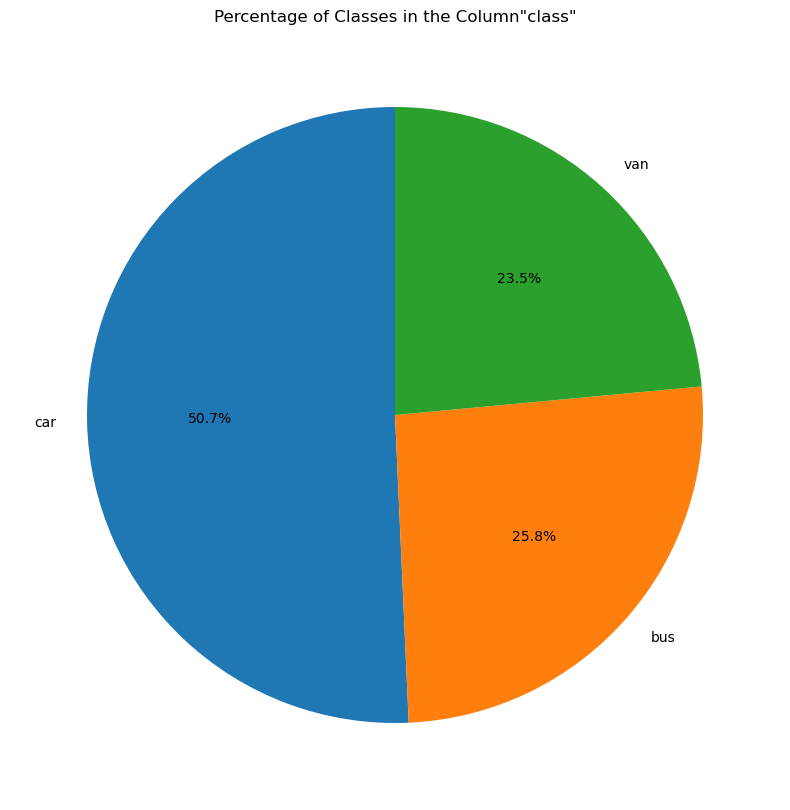

In [25]:
# 2.1.C--

class_counts = vehicle_df['class'].value_counts()

plt.figure(figsize=(10,10))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Classes in the Column"class"')
plt.show()

In [26]:
# 2.1.D-

duplicate_rows = vehicle_df[vehicle_df.duplicated()]
print ("Number of duplicated rows:", duplicate_rows.shape[0])                            

Number of duplicated rows: 0


In [27]:
# 2.2.A--

from sklearn.model_selection import train_test_split

X = vehicle_df.drop('class', axis=1)
Y = vehicle_df['class']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)


In [28]:
# 2.2.B

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# 2.3.A

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X = vehicle_df.drop('class', axis=1)
y = vehicle_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc_model = SVC(random_state=42)
svc_model.fit(X_train_scaled, y_train)

y_pred = svc_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9705882352941176


In [30]:
# 2.3.B-

from sklearn.metrics import classification_report

y_train_pred = svc_model.predict(X_train_scaled)

print("Classification Report for Train Data:")
print(classification_report (y_train, y_train_pred))

Classification Report for Train Data:
              precision    recall  f1-score   support

         bus       0.98      0.98      0.98       166
         car       1.00      0.97      0.98       351
         van       0.93      0.99      0.96       159

    accuracy                           0.98       676
   macro avg       0.97      0.98      0.97       676
weighted avg       0.98      0.98      0.98       676



In [31]:
# 2.3.C--

from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

pca_columns = [f'PC{i}' for i in range (1,11)]
X_pca_df = pd.DataFrame(data=X_pca, columns=pca_columns)

X_pca_df = pd.concat([X_pca_df, y], axis=1)
print(X_pca_df.head())

          PC1        PC2        PC3        PC4        PC5        PC6  \
0  -56.955045  12.976845  24.512508  -9.857049   6.829327   2.049628   
1 -116.501451  -9.610886  -3.758836  -6.411248   8.596032   5.841456   
2  211.913477   8.549603  17.970005  -3.137229  -1.675431  -4.073294   
3 -140.902780  19.732714 -24.174899 -15.314153  -1.496073  12.054892   
4  -98.098362  52.548475  66.603606  79.593461  15.036551  21.412809   

         PC7        PC8        PC9       PC10 class  
0  10.029308   0.050731  -0.318254   3.458486   van  
1  -5.958019  -0.163029   3.559698  -3.414663   van  
2  -4.668087  -2.065827  11.399915  -0.300559   car  
3   0.512329   0.486942  -0.599437  -3.695870   van  
4  -5.902340  19.936390   2.535514 -15.064372   bus  


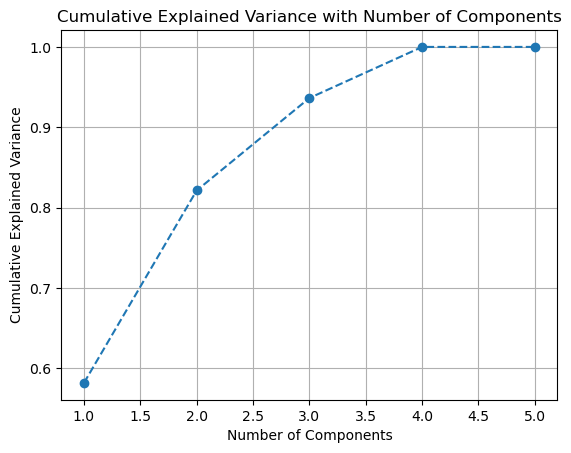

In [32]:
# 2.3.D-

from sklearn.decomposition import PCA

pca_df = pd.DataFrame({
    'PC1': [-56.955045, -116.501451, 211.913477, -140.902780, -98.098362],
    'PC2': [12.976845, -9.610886, 8.549603, 19.732714, 52.548475],
    'PC3': [24.512508, -3.758836, 17.970005, -24.174899, 66.603606],
    'PC4': [-9.857049, -6.411248, -3.137229, -15.314153, 79.593461],
    'PC5': [6.829327, 8.596032, -1.675431, -1.496073, 15.036551],
    'PC6': [2.049628, 5.841456, -4.073294, 12.054892, 21.412809],
    'PC7': [10.029308, -5.958019, -4.668087, 0.512329, -5.902340],
    'PC8': [0.050731, -0.163029, -2.065827, 0.486942, 19.936390],
    'PC9': [-0.318254, 3.559698, 11.399915, -0.599437, 2.535514],
    'PC10': [3.458486, -3.414663, -0.300559, -3.695870, -15.064372],
    'class': ['van', 'van', 'car', 'van', 'bus']
})

features = pca_df.drop('class', axis=1)

standardized_features = (features - features.mean()) / features.std()

pca = PCA()
pca.fit(standardized_features)

cumulative_var = pca.explained_variance_ratio_.cumsum()

plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance with Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


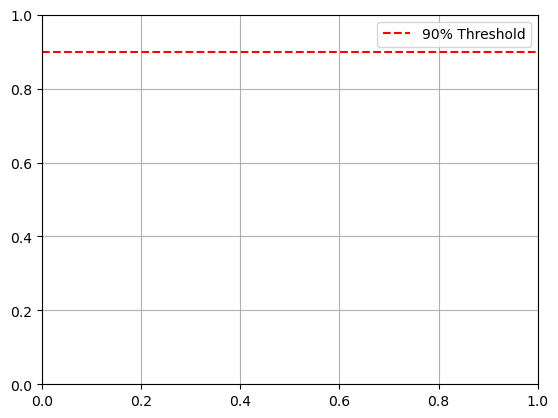

In [33]:
# 2.3.E--

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

plt.axhline(y=0.9, color='r', linestyle='--', label='90% Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# 2.3.F--

from sklearn.decomposition import PCA

scaled_data = pd.DataFrame({
    'compactness': [0.19, -1.03, 0.32, -0.64, 1.01],
    'circularity': [0.83, -0.34, 1.05, -0.41, -0.09],
    'distance_circularity': [1.02, 1.12, -0.78, 0.86, 0.17],
})

pca = PCA()
pca.fit(scaled_data)

cumulative_var = pca.explained_variance_ratio_.cumsum()

min_components = len(cumulative_var[cumulative_var >= 0.9])

pca_selected = PCA(n_components=min_components)
scaled_data_pca = pca_selected.fit_transform(scaled_data)

scaled_data_pca_df = pd.DataFrame(scaled_data_pca, columns=[f'PC{i}' for i in range(1, min_components + 1)])

print(scaled_data_pca_df)

        PC1
0  0.084497
1 -1.281902
2  1.400064
3 -0.907374
4  0.704714


In [35]:
# 2.3.G--

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("Classification Report for Test Data:\n", classification_report(y_test, y_pred))

Classification Report for Test Data:
               precision    recall  f1-score   support

         bus       0.68      0.48      0.56        52
         car       0.75      0.74      0.75        78
         van       0.59      0.82      0.69        40

    accuracy                           0.68       170
   macro avg       0.67      0.68      0.67       170
weighted avg       0.69      0.68      0.68       170



In [36]:
# 2.3.H--

from sklearn.metrics import classification_report

y_train_pred = svm_model.predict(X_train)

print("Classification Report for Train Data:\n", classification_report(y_train, y_train_pred))

Classification Report for Train Data:
               precision    recall  f1-score   support

         bus       0.57      0.49      0.53       166
         car       0.80      0.79      0.80       351
         van       0.56      0.65      0.60       159

    accuracy                           0.68       676
   macro avg       0.64      0.64      0.64       676
weighted avg       0.69      0.68      0.68       676



In [37]:
# 2.4.A--

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('pca', PCA(n_components=10)),   
    ('svm', SVC())
])

param_grid = {
    'svm__C': [0.1, 1, 10, 100],       
    'svm__gamma': [0.01, 0.1, 1, 10],  
    'svm__kernel': ['linear', 'rbf']   
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Classification Report for Test Data:\n", classification_report(y_test, y_pred))
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Classification Report for Test Data:
               precision    recall  f1-score   support

         bus       0.84      0.90      0.87        52
         car       0.93      0.86      0.89        78
         van       0.90      0.95      0.93        40

    accuracy                           0.89       170
   macro avg       0.89      0.90      0.90       170
weighted avg       0.90      0.89      0.89       170

Best Parameters: {'svm__C': 100, 'svm__gamma': 0.01, 'svm__kernel': 'linear'}


In [38]:
# 2.4.B--

# After hyperparameter tuning, the best parameters for the SVM model are:

   # C: 100
   # Gamma: 0.01
   # Kernel: 'linear'

In [39]:
# 2.4.C--

from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

original_model = Pipeline([
    ('pca', PCA(n_components=10)),
    ('svm', SVC())
])

original_model.fit(X_train, y_train)

y_pred_original_train = original_model.predict(X_train)

print("Classification Report for Original Model - Train Data:")
print(classification_report(y_train, y_pred_original_train))

tuned_model = grid_search.best_estimator_

y_pred_tuned_train = tuned_model.predict(X_train)

print("\nClassification Report for Tuned Model - Train Data:")
print(classification_report(y_train, y_pred_tuned_train))

Classification Report for Original Model - Train Data:
              precision    recall  f1-score   support

         bus       0.84      0.67      0.75       166
         car       0.85      0.86      0.85       351
         van       0.81      0.96      0.88       159

    accuracy                           0.84       676
   macro avg       0.83      0.83      0.83       676
weighted avg       0.84      0.84      0.83       676


Classification Report for Tuned Model - Train Data:
              precision    recall  f1-score   support

         bus       0.83      0.85      0.84       166
         car       0.93      0.91      0.92       351
         van       0.94      0.95      0.94       159

    accuracy                           0.91       676
   macro avg       0.90      0.90      0.90       676
weighted avg       0.91      0.91      0.91       676



In [40]:
# 2.4.C---


#     Accuracy: Improved from 84% to 91%.
#     Precision, Recall, F1-Score: Noticeable improvements across all classes.
# The tuned model shows a significant improvement in overall accuracy on the training data compared to the original model.
# Precision, recall, and F1-score values for each class have generally increased, indicating that the tuned model performs better
# in correctly classifying instances across all classes.    

In [41]:
# 2.5.A--

# Principal Component Analysis (PCA) was applied to address specific characteristics of our dataset:

# 1. High Dimensionality:
#    - Large number of features prompted PCA to reduce dimensionality while retaining essential information.

# 2. Correlated Features:
#    - PCA handled highly correlated features by identifying principal components and reducing redundancy.

# 3. Noise Reduction:
#    - PCA filtered out noise and irrelevant features, focusing on components contributing most to variance.

# 4. Visualization:
#    - PCA aided in visualizing high-dimensional data by projecting it into a more manageable space.


In [42]:
# 2.5.B--

# Advantages of PCA:

# 1. Dimensionality Reduction:
# Simplifies models by reducing the number of features, especially beneficial for high-dimensional data.

# 2. Decorrelation of Features:
# Transforms variables into uncorrelated principal components, aiding in data interpretation.

# 3. Improved Model Performance:
# Enhances model performance by focusing on components capturing maximum data variance.


# Limitations of PCA:

# 1. Loss of Interpretability:
#    Principal components may not have clear interpretability, making it challenging to understand the original features' contributions.

# 2. Assumes Linearity:
#    PCA assumes linear relationships between features, which might not hold in all datasets.

# 3. Sensitivity to Outliers:
#    PCA is sensitive to outliers, and their presence can significantly impact the resulting principal components.